<a href="https://colab.research.google.com/github/gyuwonchoi/PytorchTutorial/blob/main/TesorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torch.utils.data.dataset import T
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as f 
import torch.optim as optim


# specify the transforms
transform = transforms.Compose(
      [
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (0.5, )) # mean and std
      ]
)

# datasets
trainset= torchvision.datasets. FashionMNIST(
    root='data',
    download = True,
    train= True,
    transform= transform
) 

testset=torchvision.datasets.FashionMNIST(
    root='data',
    download=True,
    train=False,
    transform=transform
)

# dataloaders
trainloader= torch.utils.data.DataLoader(
    trainset, 
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=4,
    shuffle=False,
    num_workers=2
)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [2]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

NameError: ignored

In [ ]:
def matplotlib_imshow(img, one_channel=False):
  if one_channel:
    img=img.mean(dim=0) ## 각각의 column에 대하여 평균 
  
  img=img/2+0.5 # unnormalize
  npimg=img.numpy()

  if one_channel:
    plt.imshow(npimg, cmpa='Greys')
  else:
    plt.imshow(np.transpose(npimg, (1, 2, 0))) ## 출력될때 인덱스 각각 맵핑되는거 
    

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1=nn.Conv2d(1,6,5) #in channel, out_channle, kernel
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1= nn.Linear(16*4*4, 120)
    self.fc2= nn.Linear(120, 84)
    self.fc3= nn.Linear(84,10)

  def forward(self, x):
    x= self.pool(f.relu(self.conv1(x)))
    x= self.pool(f.relu(self.conv2(x)))
    
    # reshape
    x= x.view(-1, 16*4*4) 
    x= f.relu(self.fc1(x))
    x= f.relu(self.fc2(x))
    x=self.fc3(x)

    return x

In [ ]:
model= Net()

In [38]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

## TensorBoard 설정

In [30]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/fashion_mnist_experiment_1')

In [3]:
# 임의의 학습 이미지를 가져옴
# 반복 가능한 셋 trainloader에 대하여 첫번째 요소 하나만을 가져옴: .next()

dataiter=iter(trainloader) 
images, labels=dataiter.next()

# 이미지 그리드 생성 
img_grid=torchvision.utils.make_grid(images)

# 이미지를 보여줍니다.
matplotlib_imshow(img_grid, one_channel=True)

# tensorboard에 기록합니다.
writer.add_image('four_fashion_mnist_images', img_grid)

NameError: ignored

In [4]:
!tensorboard --logdir=runs


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [5]:
# 헬퍼 함수

def images_to_probs(net, images):
    '''
    학습된 신경망과 이미지 목록으로부터 예측 결과 및 확률을 생성합니다
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [f.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    '''
    학습된 신경망과 배치로부터 가져온 이미지 / 라벨을 사용하여 matplotlib
    Figure를 생성합니다. 이는 신경망의 예측 결과 / 확률과 함께 정답을 보여주며,
    예측 결과가 맞았는지 여부에 따라 색을 다르게 표시합니다. "images_to_probs"
    함수를 사용합니다.
    '''
    preds, probs = images_to_probs(net, images)
    # 배치에서 이미지를 가져와 예측 결과 / 정답과 함께 표시(plot)합니다
    fig = plt.figure(figsize=(12, 48))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

AttributeError: ignored

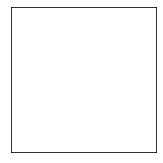

In [44]:
running_loss = 0.0
for epoch in range(1):  # 데이터셋을 여러번 반복

    for i, data in enumerate(trainloader, 0):

        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # 매 1000 미니배치마다...

            # ...학습 중 손실(running loss)을 기록하고
            writer.add_scalar('training loss',
                            running_loss / 1000,
                            epoch * len(trainloader) + i)

            # ...무작위 미니배치(mini-batch)에 대한 모델의 예측 결과를 보여주도록
            # Matplotlib Figure를 기록합니다
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(model, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            running_loss = 0.0
print('Finished Training')

In [43]:
%pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 7.5 MB/s 
     |████████████████████████████████| 950 kB 59.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
